In [1]:
import os
import sys
import importlib

import matplotlib.pyplot as plt
import pandas as pd

import path_utils
from data.make_processed_data import make_processed_data

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(''))))
import src.data.make_processed_data as mpd
importlib.reload(mpd)
from src.data.make_processed_data import *
import path_utils
importlib.reload(path_utils)
from path_utils import *
import files_utils
importlib.reload(files_utils)
from files_utils import *
from warnings import simplefilter

In [45]:
hungary_postal_codes_geo = read_data_frame(get_others_path('netrisk_casco') / 'hungary_postal_codes.csv')
hungary_postal_codes_pop = read_data_frame(get_others_path('netrisk_casco') / 'hungary_postal_codes_population.csv')
hungary_postal_codes_pop = hungary_postal_codes_pop.iloc[1 :]
hungary_postal_codes_pop = hungary_postal_codes_pop[~hungary_postal_codes_pop['PostalCode'].str.contains('ostal')]

def fix(x):
    try:
        return int(str(x).strip().replace(',', ''))
    except Exception:
        return None


def fix2(x):
    try:
        return float(str(x).replace('km²', '').strip())
    except Exception:
        return None

hungary_postal_codes_pop['Population'] = hungary_postal_codes_pop['Population'].apply(lambda x : fix(x))
hungary_postal_codes_pop['Area'] = hungary_postal_codes_pop['Area'].apply(lambda x : fix2(x))
hungary_postal_codes_pop = hungary_postal_codes_pop.dropna(subset = ['Area', 'Population'])
hungary_postal_codes_pop['PostalCode'] = hungary_postal_codes_pop['PostalCode'].astype(int) 
hungary_postal_codes_pop = hungary_postal_codes_pop.drop_duplicates(subset = ['PostalCode'])


hungary_postal_codes_geo = hungary_postal_codes_geo.drop(columns=['Unnamed: 0']).drop_duplicates(subset = ['postal_code'])

hungary_postal_codes = pd.merge(hungary_postal_codes_geo, hungary_postal_codes_pop[['PostalCode', 'Population', 'Area']], left_on='postal_code', right_on='PostalCode', how = 'left')


In [47]:
hungary_postal_codes.to_csv(get_others_path('netrisk_casco') / 'hungary_postal_codes.csv', index = False)

In [5]:
hungary_postal_codes_geo

,Unnamed: 0,postal_code,name,county,latitude,longitude
0,0,7188,Szárász,Baranya,46.3490,18.3736
1,1,7300,Komló,Baranya,46.1928,18.2649
2,2,7304,Mánfa,Baranya,46.1667,18.2500
3,3,7305,Mecsekpölöske,Baranya,46.2221,18.2112
4,4,7331,Liget,Baranya,46.2360,18.1921
...,...,...,...,...,...,...
3566,3566,8997,Zalaháshágy,Zala,46.8893,16.6277
3567,3567,8998,Ozmánbük,Zala,46.9230,16.6713
3568,3568,8998,Vaspör,Zala,46.9172,16.6477
3569,3569,8999,Zalalövő,Zala,46.8480,16.5875


In [2]:
data = read_data_frame(get_raw_data_path(data_name='quotes_data_unique_quotes', extension='parquet'))

In [3]:
data[data['vehicle_make_year'] >= 2014]     

,data_source,unique_id,calculation_time,calculation_realized,policy_start_date,calculation_reason,contractor_gender,contractor_birth_year,driver_licence_year,bonus_malus_current,...,MinDriverMainAge,OwnershipMainDuration,MutualCancellation,PreviousCancellationNoPayment,BoughtAbroad,DaysAbroadExceeds60,person_id,car_id,quote_id,calculation_date
1,quotes_data,9e69ff50-84b3-4bb5-b5f6-1263d34716b6,2024-05-02T14:40:58.000000Z,0,2024.05.02,7,F,1962.0,1997.0,A00,...,None,None,None,None,no,no,2053772557254402150,16437010690261214283,13141015386130400860,2024-05-02
2,quotes_data,d29a8754-f574-11ee-930a-02420a3c0407,2024-03-22T05:22:21.000000Z,0,2024.05.08,2,M,1965.0,1993.0,B03,...,None,None,None,None,no,no,3217120772333242547,16576640276859824737,14270983017719175594,2024-03-22
7,quotes_data,3e6b00bd-ddd3-473b-b23d-f1d116ad8de2,2024-08-11T20:51:40.000000Z,0,2024.10.10,2,M,1976.0,1997.0,B10,...,1981,2016.02.02,None,None,no,no,9012612285006135642,18172658674776382300,5143513487459429621,2024-08-11
9,quotes_data,1945aa70-9c47-4917-8775-ecfc6ea387ef,2024-07-08T10:28:26.000000Z,0,2024.09.01,2,M,1988.0,2005.0,B10,...,None,None,None,None,no,no,10446883084079208980,14928274825800567669,14746733387603934547,2024-07-08
12,quotes_data,fc4cce0c-0cc4-4242-a3f1-8a11def17e9c,2024-06-12T19:46:31.000000Z,0,2024.08.06,2,M,1970.0,1987.0,B10,...,None,None,None,None,no,no,9237592679460347402,18295800613688013652,6774777328395726104,2024-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677351,quotes_data,d5a175f6-97e1-4d1c-999d-7f39f8350d6c,2024-05-23T11:31:15.000000Z,0,2024.07.17,2,F,1971.0,1991.0,M02,...,None,None,None,None,no,no,11451694232235456778,5680379574775591875,14597401091700043167,2024-05-23
677353,quotes_data,e3e3e39b-7200-4e7c-a28c-49a9cfd9e23b,2024-07-23T15:57:18.000000Z,0,2024.07.23,7,F,1954.0,1979.0,B04,...,None,None,None,None,no,no,1242455814997925840,17791510046190823847,7830862839884753372,2024-07-23
677356,quotes_data,ffaba3a4-e36b-4947-9284-fdefb7f1f930,2024-05-19T21:47:23.000000Z,0,2024.06.26,2,M,1990.0,2010.0,B04,...,None,None,None,None,no,no,9720245875281360441,15807022060336977625,2087133613858279516,2024-05-19
677357,quotes_data,e3e433f3-31e2-44cb-9c2b-698fe54cd1c5,2024-07-11T18:23:59.000000Z,0,2024.07.11,7,M,1988.0,2008.0,B06,...,None,None,None,None,no,no,15006409569565999139,9985058149805647107,9250696251623504578,2024-07-11


In [4]:
data, features_info, features_on_top, features_model = load_data(get_processed_data_path('punkta_v1'))

In [7]:
data.columns

Index(['UNIQA-(mtpl)(assistance_standard)(personal_accident_all_passengers10000)-price',
       'UNIQA-(mtpl)(casco_repair_shop)(assistance_medium)-price',
       'WE_FOX-(mtpl)(casco(authorized_repair_shop, oryginały, bez amortyzcascoji))(assistance comfort)-price',
       'WE_FOX-(mtpl)(casco(authorized_repair_shop, oryginały, bez amortyzcascoji))(personal_accident_all_passengers)(assistance basic)-price',
       'UNIQA-(mtpl (6-10 year old car))(casco_authorized_repair_shop)(assistance_medium)(personal_accident_all_passengers)-price',
       'licence_at_age', 'player_1-(mtpl)(green_card)-price',
       'player_1-(mtpl)(green_card)(assistance basic)(personal_accident_all_passengers)(casco "ekonomiczne" (udział własny 10% zamienniki,cash_settlement,amortyzcascoja))-price',
       'WE_FOX-(mtpl)(personal_accident_all_passengers)(assistance standard)-price',
       'EUROINS-(mtpl)(personal_accident_all_passengers)(assistance)(tyres)-price',
       ...
       'YOU_CAN_DRIVE-(mtpl)(assist

In [14]:
data[data['FITCASCO-(mtpl)-price'] == data['FITCASCO-(mtpl)-price'].max()]['BESAFE-(mtpl)-price']

348      8000.000000
349      8000.000000
1615     8000.000000
2669     6326.729980
3024     6515.689941
3083     8000.000000
3531     8000.000000
7167     5493.540039
7168     7141.600098
8401             NaN
8873     4212.450195
9398     8000.000000
9502     8000.000000
11254    8000.000000
11617    8000.000000
13414    8000.000000
13561    8000.000000
14742    8000.000000
Name: BESAFE-(mtpl)-price, dtype: float32

In [15]:
data = pd.read_parquet(get_raw_data_path(data_name='punkta_data_processed_2024_08', extension='.parquet'))

In [16]:
data[data['FITCASCO-[mtpl]-price'] == 7777]

,data_source,unique_id,calculation_time,calculation_realized,policy_start_date,contractor_gender,contractor_birth_year,driver_licence_year,number_of_damages_caused_in_last_5_years,owner_driver_same,...,UNIQA-[casco_repair_shop]-isolated_price,UNIQA-[assistance_prestige personal_accident_all_passengers10000]-isolated_price,UNIQA-[casco_cash_settlement without_amortization]-isolated_price,"UNIQA-[casco_authorized_repair_shop,500]-isolated_price","UNIQA-[casco_repair_shop,500]-isolated_price",UNIQA-[personal_accident_all_passengers10000]-isolated_price1,YOU_CAN_DRIVE-[personal_accident_all_passengers1]-isolated_price,YOU_CAN_DRIVE-[casco cash_settlement]-isolated_price,YOU_CAN_DRIVE-[assistance1]-isolated_price,YOU_CAN_DRIVE-[window_insurance]-isolated_price
2518,punkta_data_2024_08,170113899,2024-07-18,0,2024-08-09,M,1930.0,1950.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2591,punkta_data_2024_08,170114899,2024-07-22,0,2024-08-09,M,1972.0,1995.0,5,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,punkta_data_2024_08,170121588,2024-07-31,0,2024-08-11,M,1961.0,1981.0,2,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3416,punkta_data_2024_08,170128812,2024-08-10,0,2024-08-12,M,1985.0,2004.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4655,punkta_data_2024_08,170150514,2024-07-22,0,2024-08-18,M,2001.0,2019.0,0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,189.0,NaN
5959,punkta_data_2024_08,170173585,2024-07-29,0,2024-08-24,M,1950.0,1972.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6562,punkta_data_2024_08,170184691,2024-07-27,0,2024-08-26,M,1996.0,2015.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,429.0,NaN
6728,punkta_data_2024_08,170187603,2024-08-08,0,2024-08-27,F,1970.0,2000.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8639,punkta_data_2024_08,170308807,2024-07-10,0,2024-08-07,F,1998.0,1899.0,0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,240.0,NaN
8759,punkta_data_2024_08,170313237,2024-07-11,0,2024-08-04,F,1992.0,2014.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data[(data['BESAFE-[mtpl]-price'] == 8000) & (data['FITCASCO-[mtpl]-price'] == 7777)]

,data_source,unique_id,calculation_time,calculation_realized,policy_start_date,contractor_gender,contractor_birth_year,driver_licence_year,number_of_damages_caused_in_last_5_years,owner_driver_same,...,UNIQA-[casco_repair_shop]-isolated_price,UNIQA-[assistance_prestige personal_accident_all_passengers10000]-isolated_price,UNIQA-[casco_cash_settlement without_amortization]-isolated_price,"UNIQA-[casco_authorized_repair_shop,500]-isolated_price","UNIQA-[casco_repair_shop,500]-isolated_price",UNIQA-[personal_accident_all_passengers10000]-isolated_price1,YOU_CAN_DRIVE-[personal_accident_all_passengers1]-isolated_price,YOU_CAN_DRIVE-[casco cash_settlement]-isolated_price,YOU_CAN_DRIVE-[assistance1]-isolated_price,YOU_CAN_DRIVE-[window_insurance]-isolated_price
2591,punkta_data_2024_08,170114899,2024-07-22,0,2024-08-09,M,1972.0,1995.0,5,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4655,punkta_data_2024_08,170150514,2024-07-22,0,2024-08-18,M,2001.0,2019.0,0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,189.0,NaN
5959,punkta_data_2024_08,170173585,2024-07-29,0,2024-08-24,M,1950.0,1972.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6728,punkta_data_2024_08,170187603,2024-08-08,0,2024-08-27,F,1970.0,2000.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8639,punkta_data_2024_08,170308807,2024-07-10,0,2024-08-07,F,1998.0,1899.0,0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,240.0,NaN
8759,punkta_data_2024_08,170313237,2024-07-11,0,2024-08-04,F,1992.0,2014.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8828,punkta_data_2024_08,170317475,2024-07-23,0,2024-08-14,M,2001.0,2019.0,3,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,308.0,NaN
9173,punkta_data_2024_08,170340991,2024-07-18,0,2024-08-03,M,1964.0,2022.0,8,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12604,punkta_data_2024_08,170437052,2024-08-07,0,2024-08-07,F,2000.0,2020.0,0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,6807.0,103.0,176.0
13989,punkta_data_2024_08,170490158,2024-08-19,0,2024-08-20,M,1997.0,2015.0,0,yes,...,4285.0,NaN,NaN,NaN,NaN,NaN,44.0,NaN,362.0,666.0


([<matplotlib.axis.XTick at 0x7080a8bed2e0>,
 [Text(26.0, 0, '26'),
  Text(16.0, 0, '16'),
  Text(21.0, 0, '21'),
  Text(36.0, 0, '36'),
  Text(10.0, 0, '10'),
  Text(47.0, 0, '47'),
  Text(31.0, 0, '31'),
  Text(41.0, 0, '41'),
  Text(22.0, 0, '22'),
  Text(34.0, 0, '34'),
  Text(207.0, 0, '207'),
  Text(46.0, 0, '46'),
  Text(62.0, 0, '62')])

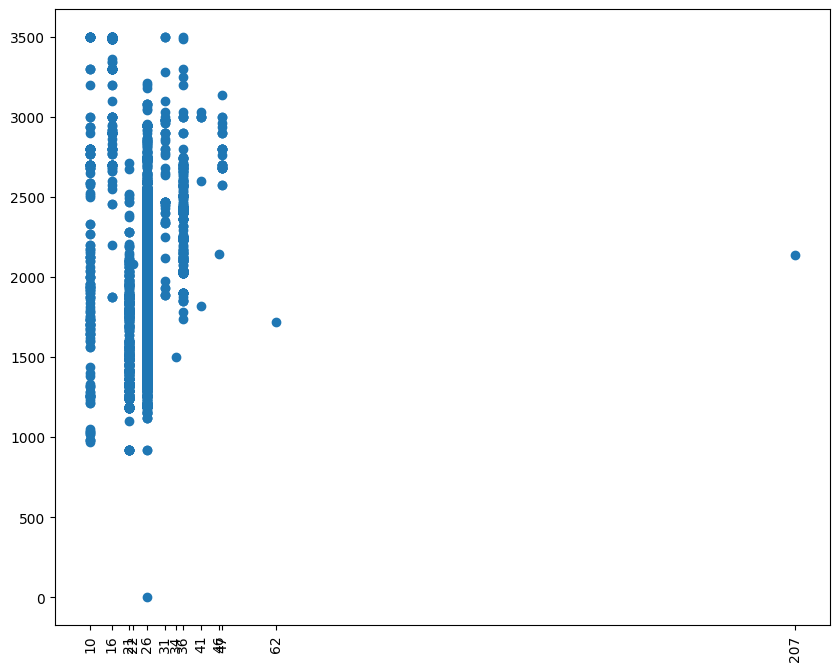

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(data['LINK4-[personal_accident_all_passengers]-isolated_price'], data['vehicle_weight_max'])
plt.xticks(data['LINK4-[personal_accident_all_passengers]-isolated_price'].dropna().unique(), rotation=90)